# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name=".\\Banana_Windows_x86_64\\Banana_Windows_x86_64\\Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [ ]:
# Close out the environment
env.close()

# Kernel needs to be restarted to instantiate another environment, this is a UnityEnvironment bug
# After kernel reset continue running from this cell below
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


# Define a pytorch network model
class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64):
        """ Intialize parameters and build model.
        
        Args:
            state_size (int): Dimension of each state (inital input size)
            action_size (int): Dimension of each action (output size for actions)
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        
        # Make sure we build upon nn.Module initialization
        super().__init__()
        
        # Seed for weight initialization
        self.seed = torch.manual_seed(seed)
        
        # Define the network layers
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)

    def forward(self, state):
        """Build a network that maps state -> action values."""
        
        # Pass the state through the layers
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        
        # Return the last linear layer activations, these can be interpreted as the Q value rewards for an action
        # A high activation (reward) value would correspond to the best action to take (index of highest activation)
        return self.fc3(x)

In [2]:
import numpy as np
import random
from collections import namedtuple, deque
import torch
import torch.nn.functional as F
import torch.optim as optim


# Hyperparameters, adjust settings to train differently
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters (blends networks slowly)
LR = 1e-4               # learning rate (aka alpha)
UPDATE_EVERY = 3        # how often to update the network

# Train on a GPU if available otherwise use the CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Set up an agent class to work with the environment and interact
class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, seed):
        """Initialize an Agent object.
        
        Args:
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)

        # Q-Network
        # Prediction network that gets updated by batch size
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device) # aka w (y^ or prediction)
        
        # Fixed network for target values that gets replaced with the prediction (local) network after UPDATE_EVERY timesteps
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device) # aka w- (truth used for loss)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR)
 
        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
    
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                
                # Sample some experiences from memory
                experiences = self.memory.sample()
                
                # Use those experiences to train on
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Args:
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        
        # Add a fake batch dimension for single examples
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            # Get the action value logits (state, actions)
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Args:
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        
        states, actions, rewards, next_states, dones = experiences

        # Get max predicted Q values (for next states) from target model
        # Perform a forward pass to get Q values for all actions, detaches result from graph, 
        # gets the max Q values for batch, reshapes to (batch_size, Q max result). 
        # Results in max Q value for each state is aligned with the experiences batch
        # The max Q value corresponds to the max reward expected for that action aka the best target to try to get to
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        
        # Compute Q targets for next state, Q_targets_next is the maximum expected return for the next state
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones)) # factor reward with discounted return

        # Get expected Q values from local model
        # Perform a forward pass to get Q values for all actions (batch_size, actions), gather results across the columns
        # (actions possible) and collect the Q values used from the previous actions in memory
        Q_expected = self.qnetwork_local(states).gather(1, actions) # actions is (batch_size, action index value)

        # Compute loss using the calulated next_state expected return and previous Q(s,a) pairs
        loss = F.mse_loss(Q_expected, Q_targets)
        
        # Minimize the loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
           θ_target = τ*θ_local + (1 - τ)*θ_target

        Args:
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

            
# Design a replay buffer with a circular type queue
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Args:
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        
        """Return the current size of internal memory."""
        return len(self.memory)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 5.22
Episode 200	Average Score: 9.00
Episode 271	Average Score: 13.12
Environment solved in 271 episodes!	Average Score: 13.12


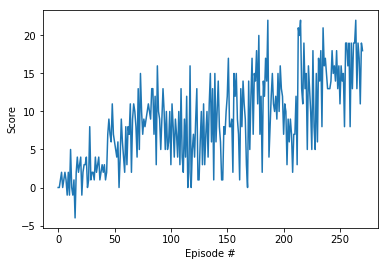

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from unityagents import UnityEnvironment

# Interact with the environment and start learning
# Instantiate the Unity Environment and Agent to be used (seed for consistency between tests)
env = UnityEnvironment(file_name=".\\Banana_Windows_x86_64\\Banana_Windows_x86_64\\Banana.exe", seed=0)

def dqn(env, n_episodes=1500, max_t=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.75):
    """Deep Q-Learning.
    
    Args:
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """

    # Get the default brain environment for the project (BananaBrain)
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]

    # Unity Environment reset
    env_info = env.reset(train_mode=True)[brain_name] # <-- use the brain name index to reset environment brain specifically

    # Get the number of possible actions
    action_size = brain.vector_action_space_size

    # Get the number of possible states
    state = env_info.vector_observations[0] # <-- this will also be used for the first state in training
    state_size = len(state)

    # Agent instantiation to be used for interaction
    agent = Agent(state_size=state_size, action_size=action_size, seed=0)

    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment at the begining of the episode
        state = env_info.vector_observations[0] # grab the starting state for the environment
        score = 0 # reset the score to 0 to start
        
        for t in range(max_t):
            action = agent.act(state, eps) # using our agent select an action with a epsilon greedy policy
            info = env.step(int(action)) # use the action selected in the environment
            
            # Collect information about the new environment state
            brain_info = info[brain_name] # get the brain info object
            next_state = brain_info.vector_observations[0] # get new state
            reward = brain_info.rewards[0] # get the reward from the action taken
            done = brain_info.local_done[0] # check for episode termination status
            
            # Collect the experience and store it with the agent
            agent.step(state, action, reward, next_state, done) # add the experience to the agents replay memory
            state = next_state # reset the state to the next state to move a step forward for the agent action selection
            score += reward # keep track of total reward
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        # Print the average score after the episode
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        # Print the average score for every 100th episode
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        # Confirm we have met the rubric requirements for minimum score (Average reward (over 100 episodes) of at least 13+)
        if np.mean(scores_window) >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    
    # Close out the environment
    env.close()
    
    return scores

scores = dqn(env)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
